# Implementation of knn

### Problem Statement: Predicting cancer cases and no-cancer cases

### Data Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei

## Attribute Information:
<br> Real-valued features are computed for three cell nucleus that are mean, se, worst
<br>a) radius (mean of distances from center to points on the perimeter) 
<br>b) texture (standard deviation of gray-scale values) 
<br>c) perimeter 
<br>d) area 
<br>e) smoothness (local variation in radius lengths) 
<br>f) compactness (perimeter^2 / area - 1.0) 
<br>g) concavity (severity of concave portions of the contour) 
<br>h) concave points (number of concave portions of the contour) 
<br>i) symmetry 
<br>j) fractal dimension ("coastline approximation" - 1)


### Import important libraries

In [1]:
import os as os

In [2]:
os.listdir()

[' Topmate _ IPL Data Analysis.ipynb',
 '.conda',
 '.condarc',
 '.continuum',
 '.eclipse',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.node_repl_history',
 '.spyder-py3',
 '.vscode',
 '17.4, Confusion Matrix, Sns, Act vs Pred.ipynb',
 '28,5 class. k-means.ipynb',
 '3D Objects',
 '4th june.ipynb',
 '5.8.2022 class Bank Credit Card.ipynb',
 'anaconda3',
 'AppData',
 'Application Data',
 'application_data.csv',
 'Arko _ Data Visualisation in Python - Case Study.ipynb',
 'array.ipynb',
 'Assignment on IPL data.ipynb',
 'BankCreditCard.csv',
 'basic python codes.ipynb',
 'break function.ipynb',
 'capstone 4.ipynb',
 'capstone not completed 2.ipynb',
 'capstone not completed 3.ipynb',
 'capstone not completed 6.ipynb',
 'Capstone Project  Win Prediction complete.ipynb',
 'capstone Vivek, NOt complete.ipynb',
 'capstone. not completed.ipynb',
 'Case+Study+Notebook.zip',
 'Contacts',
 'Cookies',
 'Copy_of_string_clustering.ipynb',
 'Copy_of_string_clustering.

In [3]:
os.chdir("C:\\Users\\Ankita\\Desktop\\imarticus\\knn")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Data Import

In [6]:
# reading data set
df_cancerdata = pd.read_csv("cancerdata.csv")
display(df_cancerdata)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.400,0.007540,0.028043,0.053730,0.015870,0.027044,0.003133,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.711900,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.080,0.003675,0.019118,0.018600,0.013400,0.021795,0.000128,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.241600,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.030,0.009390,0.035186,0.038320,0.020580,0.020481,0.004616,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.450400,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.230,0.006981,-0.028741,0.056610,0.018670,0.014801,0.003431,14.910,26.50,98.87,567.7,0.20980,0.224998,0.686900,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.440,0.006293,0.020667,0.056880,0.018850,0.026821,0.005654,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.400000,0.126386,0.2364,0.087483
5,843786,M,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,0.227180,0.065421,0.322909,1.599247,5.513125,27.190,0.006654,0.046030,0.036720,0.011370,0.010786,0.001532,15.470,23.75,103.40,741.6,0.17910,0.365008,0.535500,0.155545,0.3985,0.057922
6,844359,M,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,0.179330,0.065234,0.031699,1.869043,3.183762,53.910,0.003874,-0.002957,0.022540,0.010390,0.014651,0.002918,22.880,27.66,153.20,1606.0,0.14420,0.132926,0.378400,0.031519,0.3063,0.079428
7,84458202,M,15.542603,15.964994,90.20,577.9,0.106318,0.152953,0.242739,-0.030635,0.204175,0.058607,0.228232,0.754910,4.397724,50.960,0.009780,0.035366,0.024880,0.014480,0.009447,-0.001629,17.060,28.14,110.60,897.0,0.16540,0.388596,0.267800,0.085846,0.3196,0.082534
8,844981,M,15.087924,15.125671,87.50,519.8,0.095879,0.046530,-0.093628,-0.009774,0.205168,0.068256,0.163806,1.763019,-0.439781,24.320,0.003887,0.022873,0.035530,0.012260,0.025836,0.003495,15.490,30.73,106.20,739.3,0.17030,0.315621,0.539000,0.107188,0.4378,0.095350
9,84501001,M,15.150892,18.319345,83.97,475.9,0.110456,0.012679,0.028059,-0.001305,0.194958,0.077700,0.169951,1.017084,-0.871862,23.940,0.009092,-0.003894,0.077430,0.014320,0.021242,-0.000398,15.090,40.68,97.65,711.4,0.18530,0.241266,1.105000,0.197198,0.4366,0.072885


In [7]:
import warnings
warnings.filterwarnings('ignore')

### We remove the columns that we do not need 

In [8]:
# removing id and Unnamed columns
df_cancerdata = df_cancerdata.drop(['id'], axis = 1) 

In [9]:
df_cancerdata[['radius_mean','perimeter_mean']]

,radius_mean,perimeter_mean
0,14.204716,122.80
1,18.483496,132.90
2,15.516300,130.00
3,15.540583,77.58
4,14.005198,135.10
5,14.084106,82.57
6,15.199230,119.60
7,15.542603,90.20
8,15.087924,87.50
9,15.150892,83.97


### Dimensions of dataset

In [10]:
# To get dimensions of dataset
df_cancerdata.shape

(569, 31)

### Checking datatypes

In [11]:
# check datatypes
df_cancerdata.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors           float64
concavity_worst            float64
concave points_worst

dtypes handles data type of variables. here we can see that all the values are numeric in our dataset

### Checking missing values

In [12]:
# Check for null values
df_cancerdata.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In the above result we can see that null values are not present in the dataset

## Summary Statistics
Here we take a look at the summary of each attribute

In [13]:
# To get summary statistics of data
df_cancerdata.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,0.063291,0.420306,1.206972,3.014281,40.337079,0.006921,0.025483,0.031894,0.011796,0.020458,0.003916,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,0.006770,0.279339,0.534069,2.070656,45.491006,0.003069,0.017796,0.030186,0.006170,0.008280,0.002670,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,0.041265,-0.372471,-0.546491,-4.707076,6.802000,-0.001133,-0.028741,0.000000,0.000000,-0.005896,-0.003879,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,0.058996,0.227769,0.822432,1.642622,17.850000,0.004856,0.014254,0.015090,0.007638,0.014591,0.002096,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,0.062821,0.417595,1.219510,2.964648,24.530000,0.006996,0.025416,0.025890,0.010930,0.020653,0.003928,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,0.067782,0.625950,1.549142,4.341242,45.190000,0.009152,0.037804,0.042050,0.014710,0.026359,0.005818,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,0.087951,1.461752,2.786341,8.611148,542.200000,0.015543,0.075790,0.396000,0.052790,0.042971,0.011591,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


Summary of statistics pertaining to the DataFrame columns. This function gives the mean, std, minimum value, maximum value and IQR values and given summary about numeric columns

<AxesSubplot: xlabel='texture_mean', ylabel='Density'>

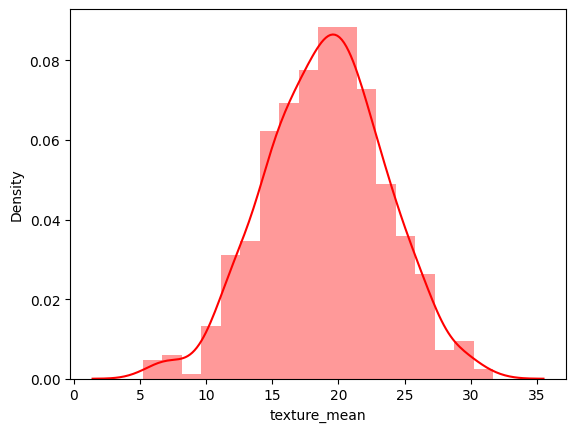

In [14]:
sns.distplot(df_cancerdata["texture_mean"],color='red')

<AxesSubplot: xlabel='diagnosis', ylabel='texture_mean'>

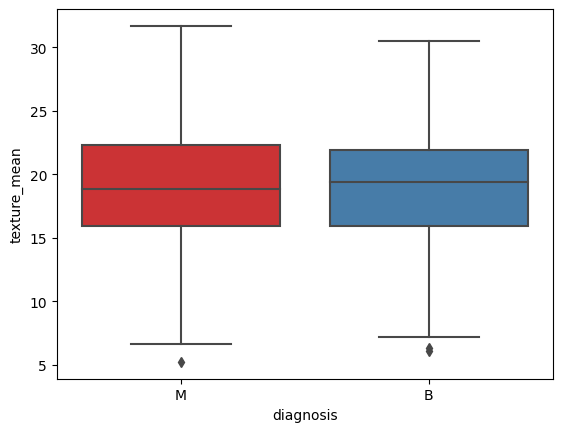

In [15]:

sns.boxplot(x="diagnosis",y="texture_mean",data=df_cancerdata,palette="Set1")

<AxesSubplot: xlabel='perimeter_mean', ylabel='Density'>

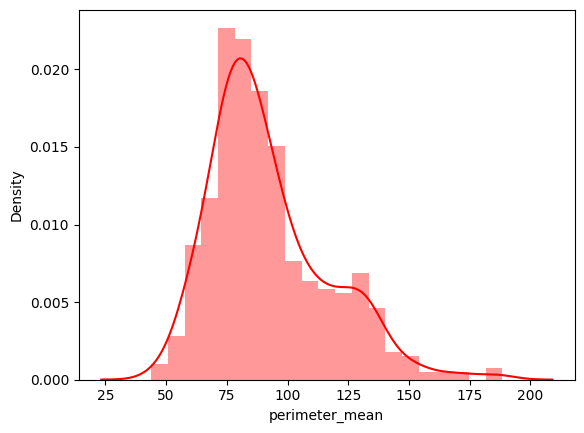

In [16]:
sns.distplot(df_cancerdata["perimeter_mean"],color="red")

<AxesSubplot: xlabel='diagnosis', ylabel='perimeter_mean'>

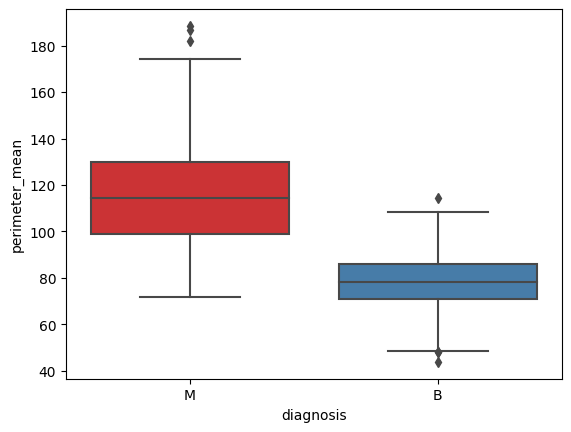

In [17]:
sns.boxplot(x="diagnosis",y="perimeter_mean",data=df_cancerdata,palette="Set1")

<AxesSubplot: xlabel='area_mean', ylabel='Density'>

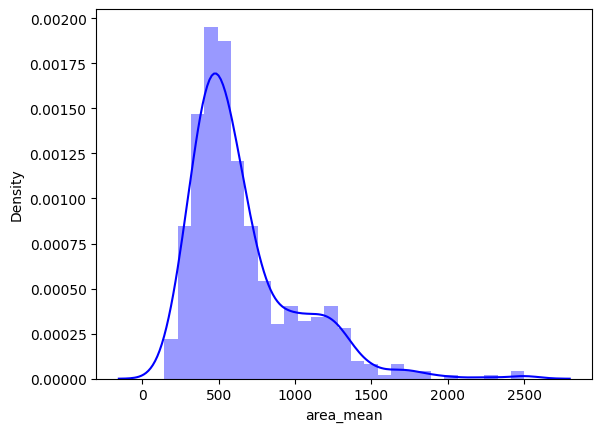

In [18]:
sns.distplot(df_cancerdata["area_mean"],color="blue")

<AxesSubplot: xlabel='diagnosis', ylabel='area_mean'>

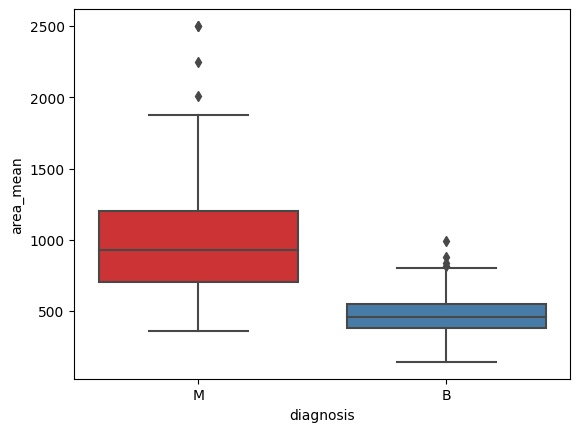

In [19]:
sns.boxplot(x="diagnosis",y="area_mean",data=df_cancerdata,palette="Set1")

<AxesSubplot: xlabel='diagnosis', ylabel='smoothness_mean'>

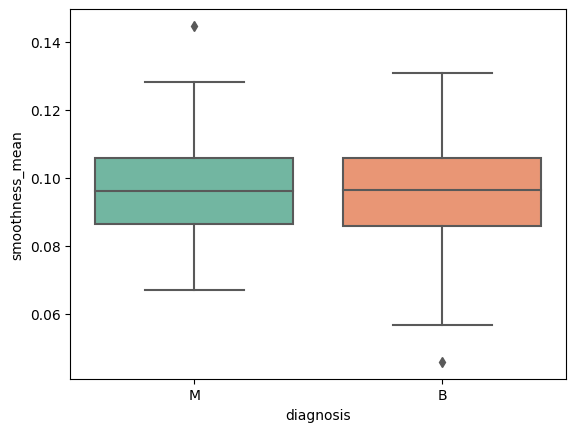

In [20]:
sns.boxplot(x="diagnosis",y="smoothness_mean",data=df_cancerdata,palette="Set2")

<AxesSubplot: xlabel='compactness_mean', ylabel='Density'>

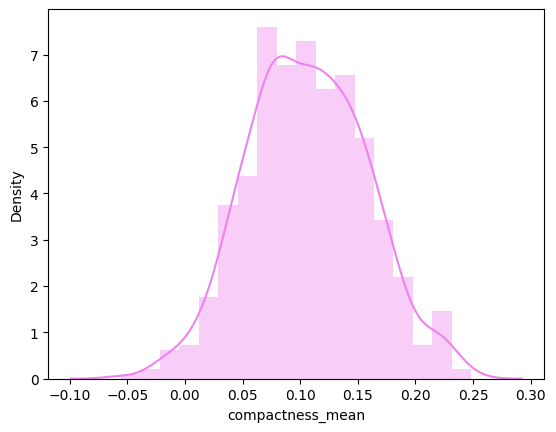

In [21]:
sns.distplot(df_cancerdata['compactness_mean'],color="violet")

<AxesSubplot: xlabel='diagnosis', ylabel='compactness_mean'>

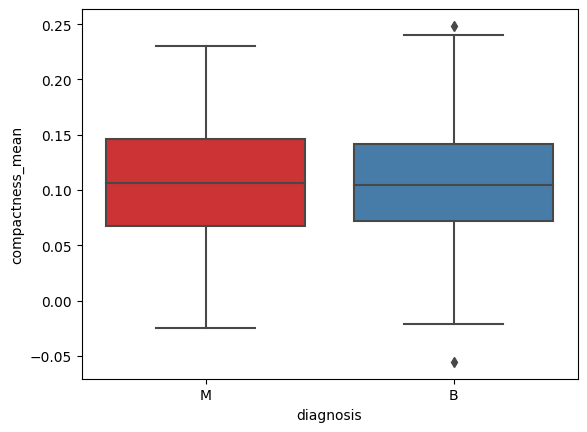

In [22]:
sns.boxplot(x="diagnosis",y="compactness_mean",data=df_cancerdata,palette="Set1")

<AxesSubplot: xlabel='diagnosis', ylabel='perimeter_se'>

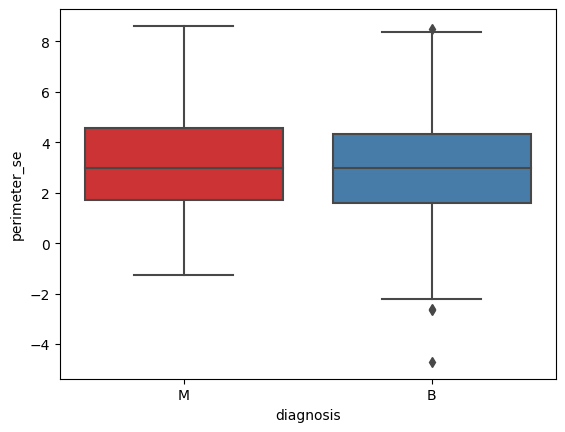

In [23]:
sns.boxplot(x="diagnosis",y="perimeter_se",data=df_cancerdata,palette="Set1")

In [24]:
cancer_num= df_cancerdata.select_dtypes(include=np.number)
cancer_num.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


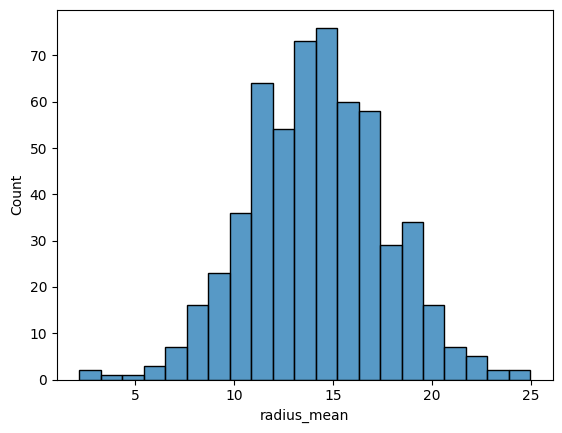

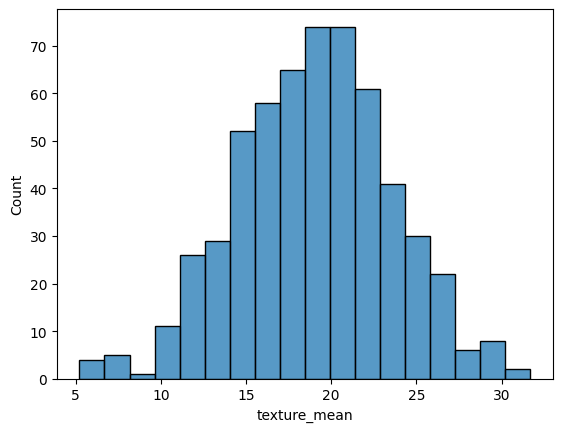

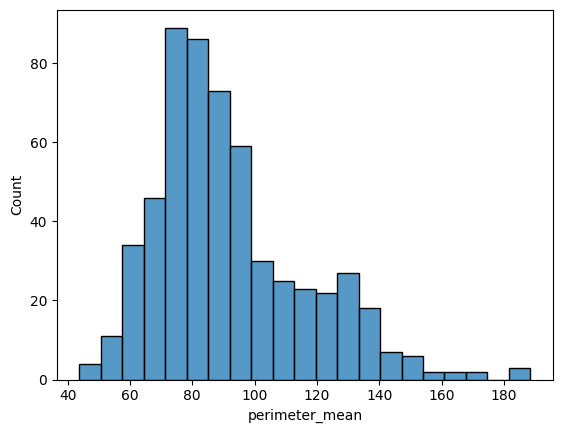

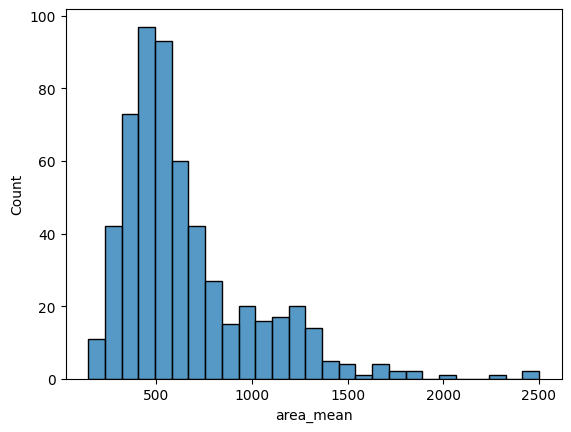

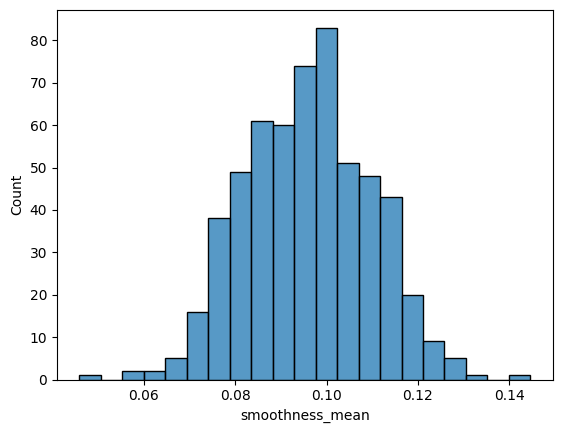

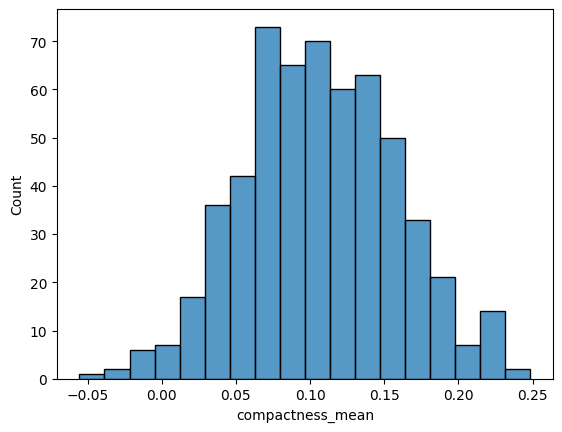

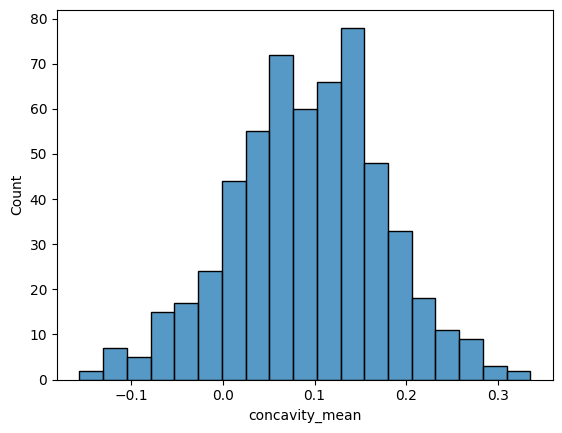

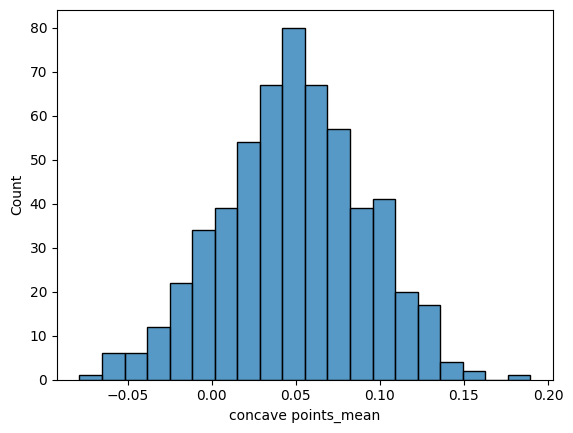

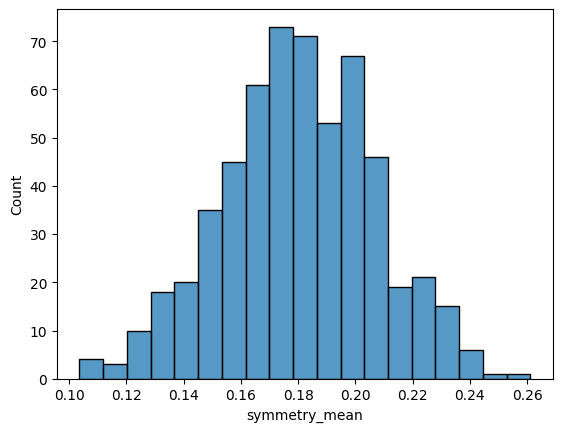

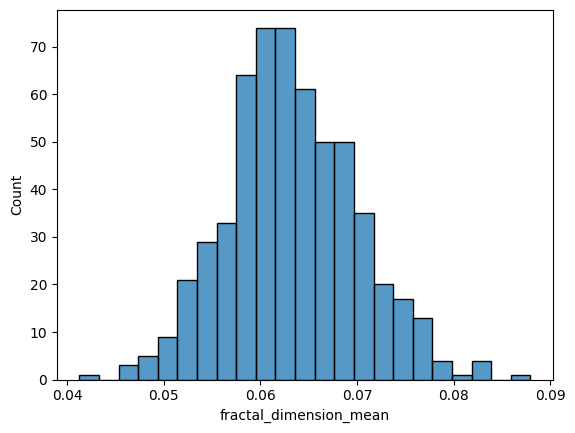

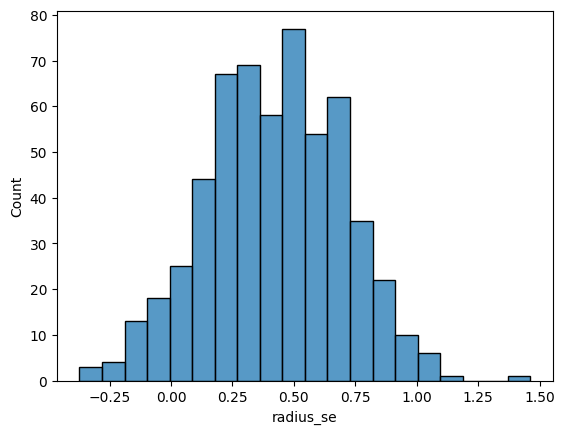

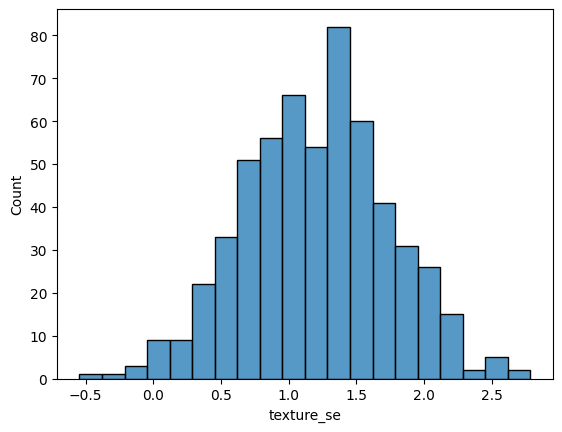

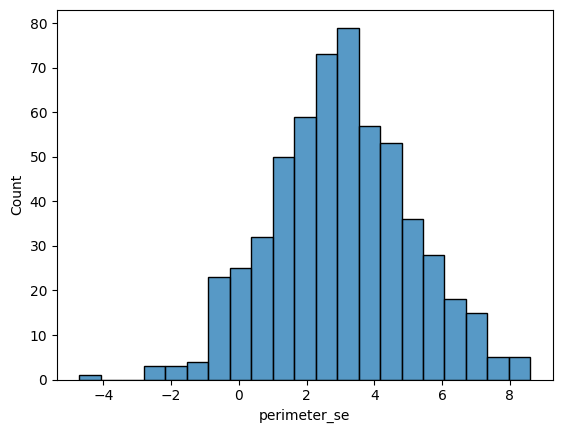

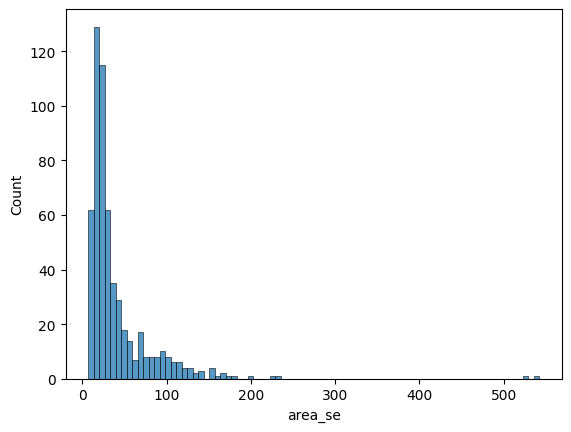

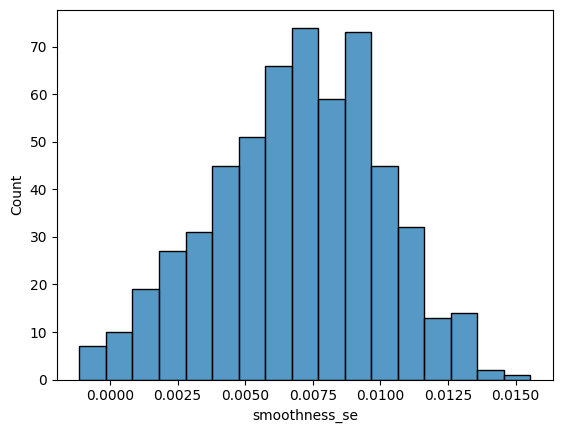

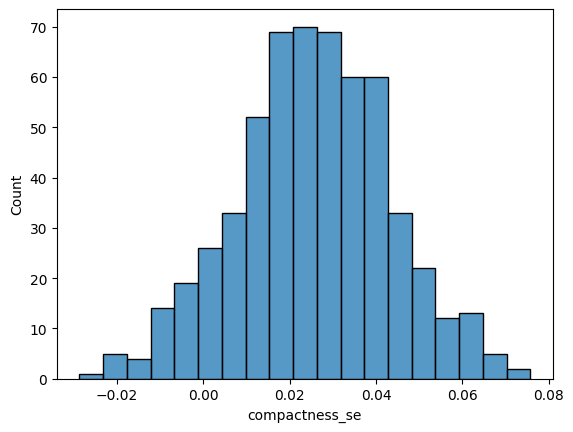

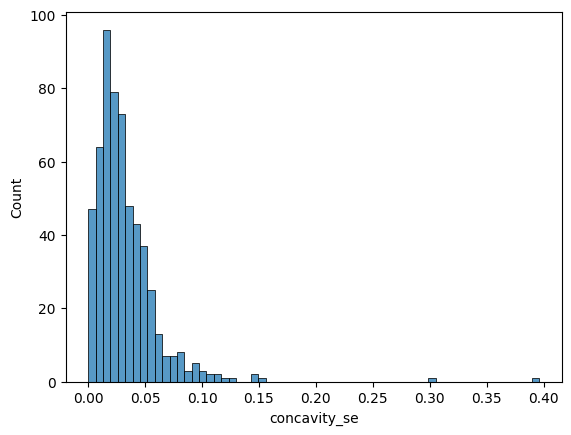

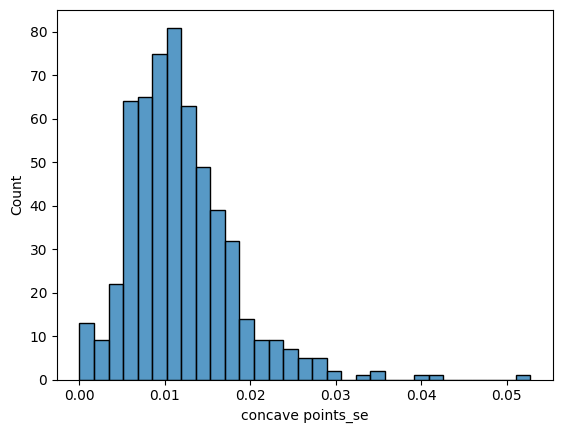

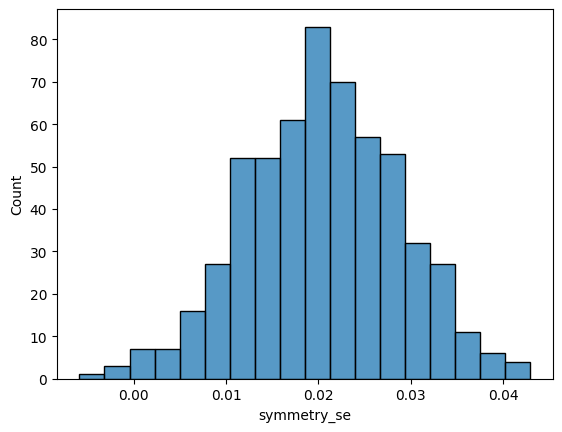

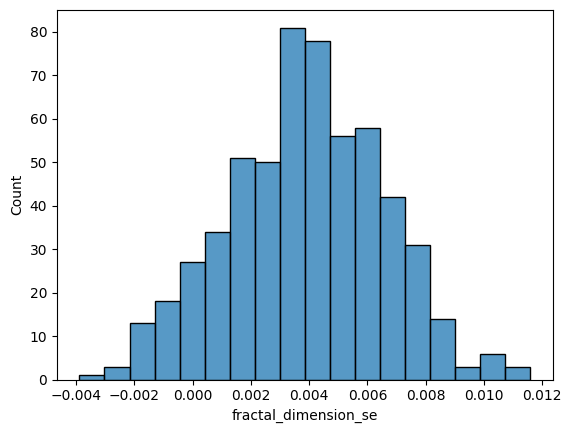

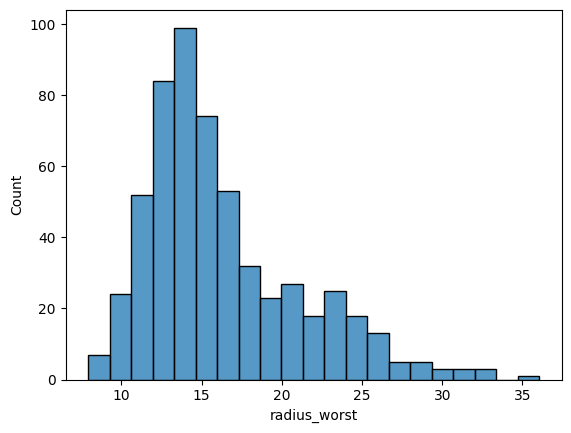

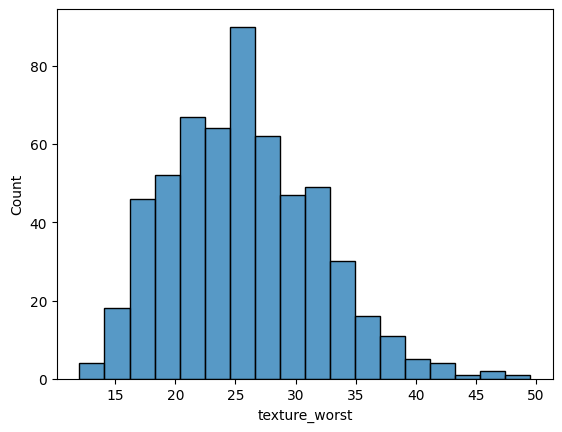

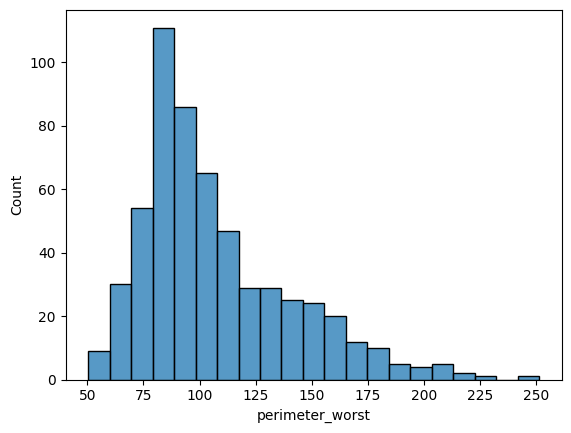

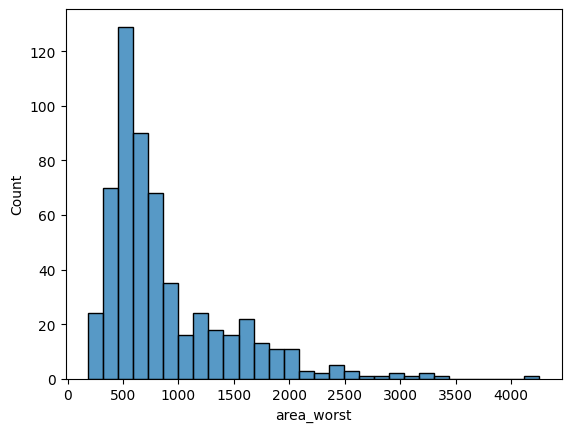

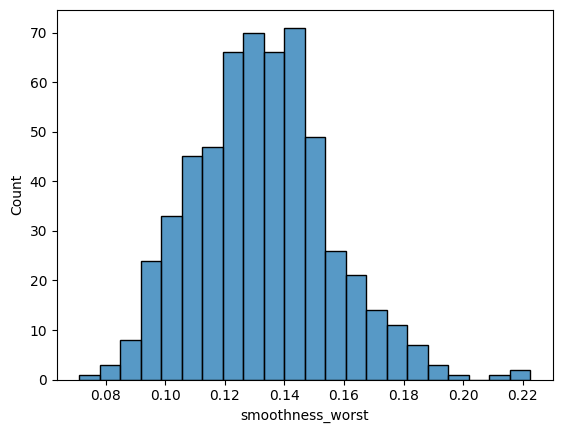

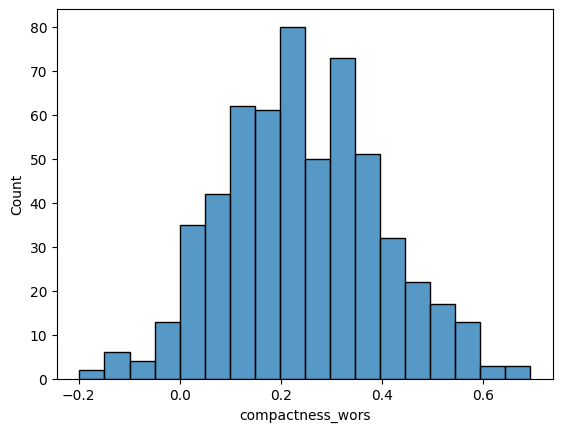

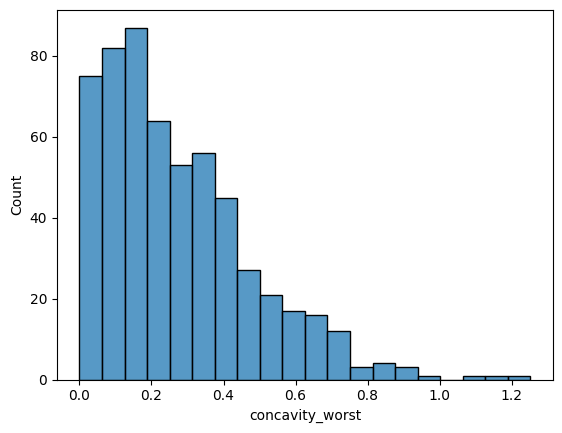

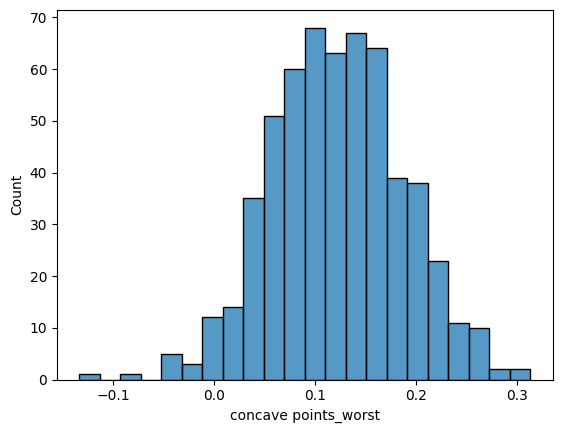

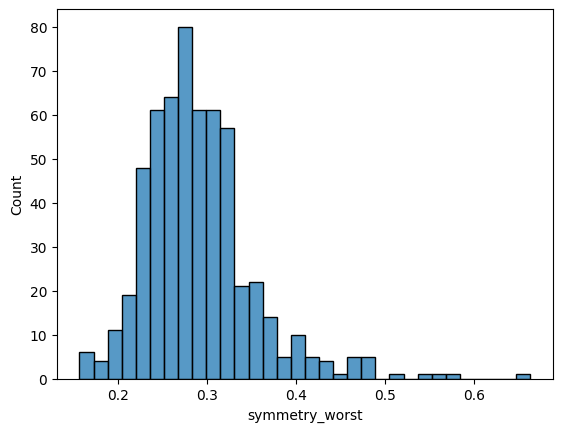

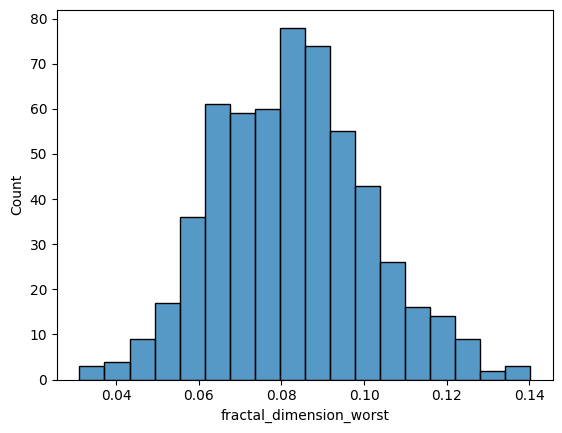

In [25]:
from matplotlib.pyplot import figure
for i in cancer_num.columns:
    figure()
    sns.histplot(cancer_num[i])

In [26]:
cancer_num.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

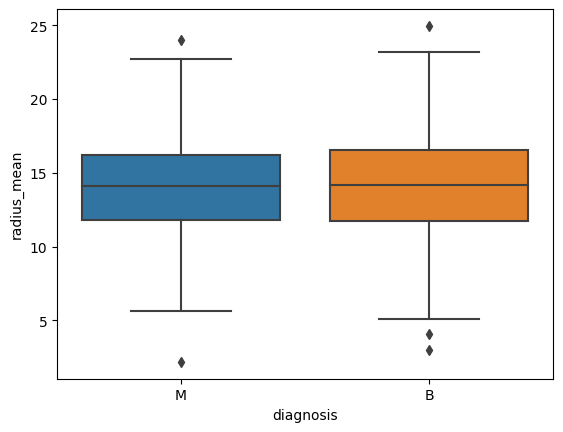

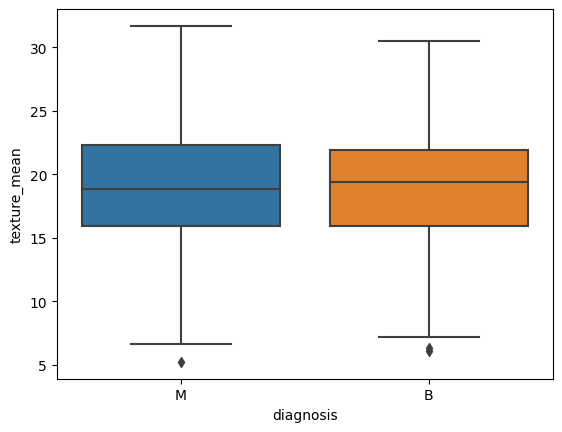

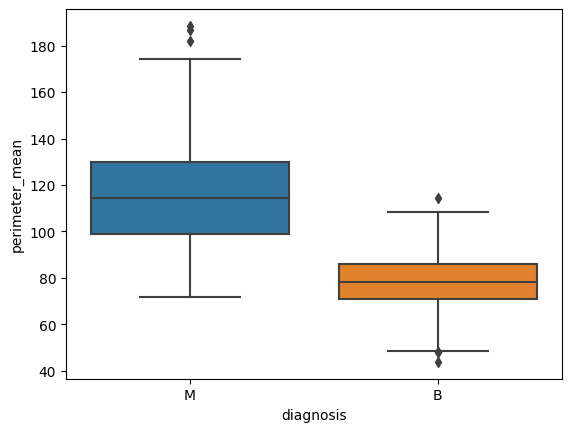

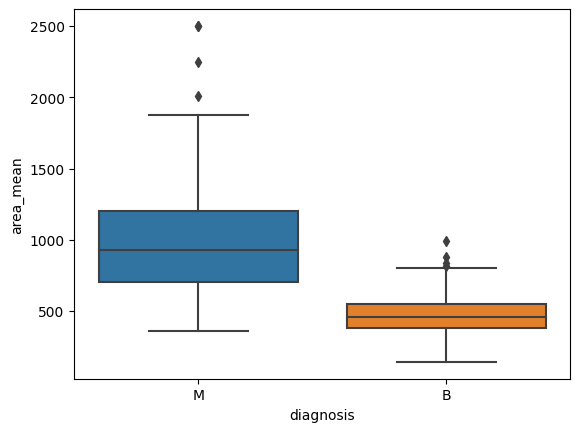

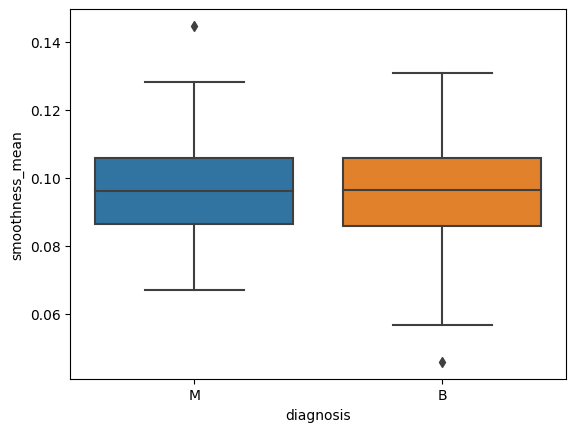

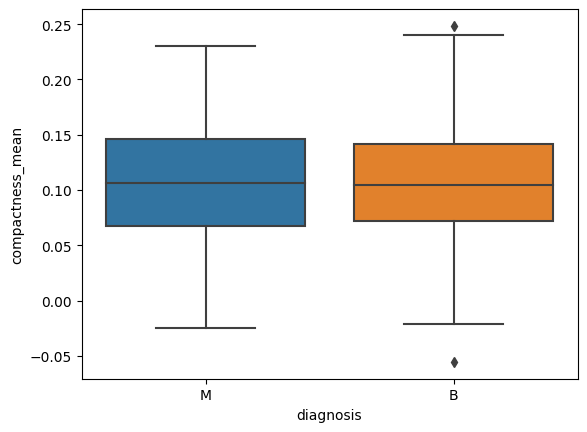

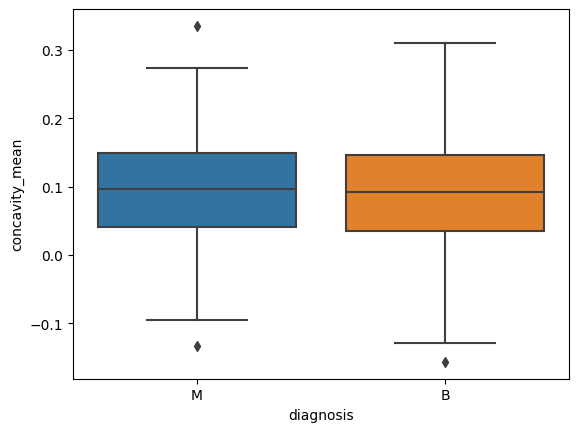

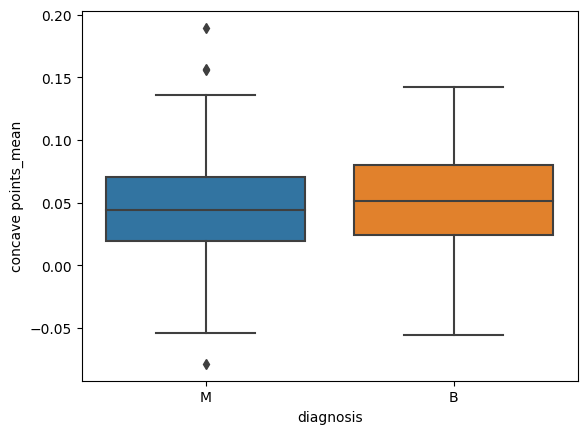

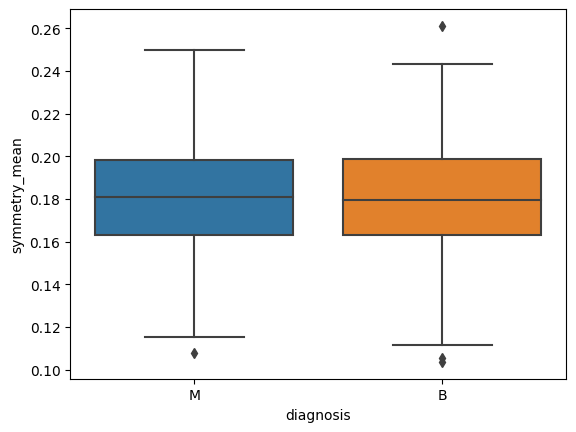

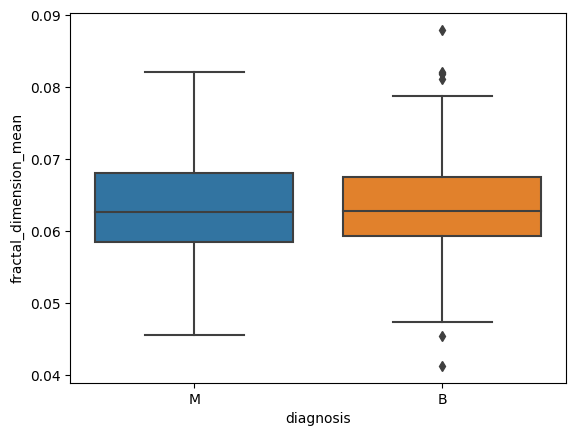

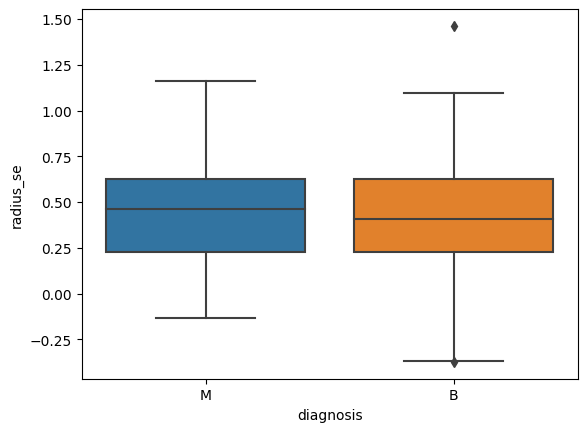

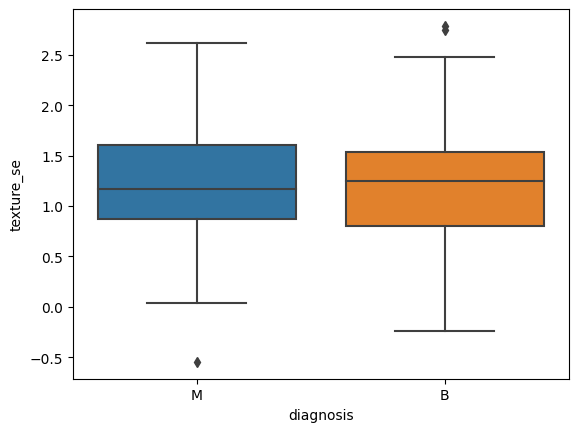

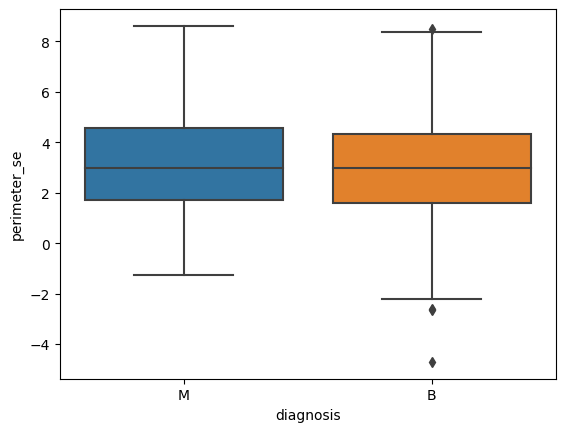

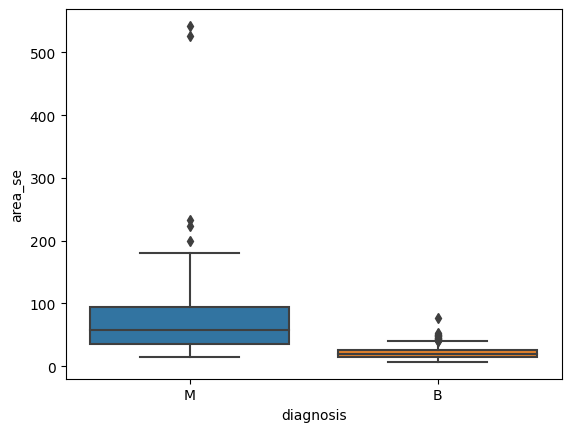

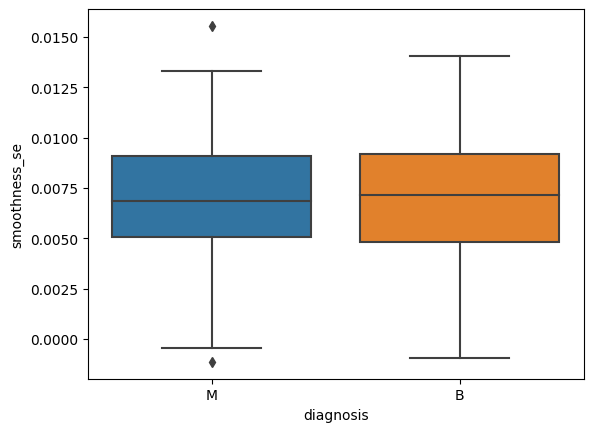

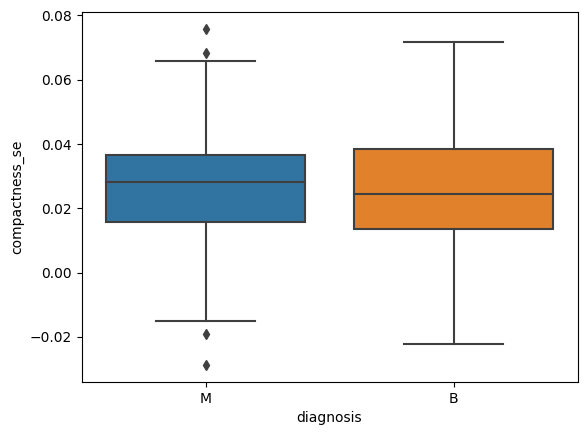

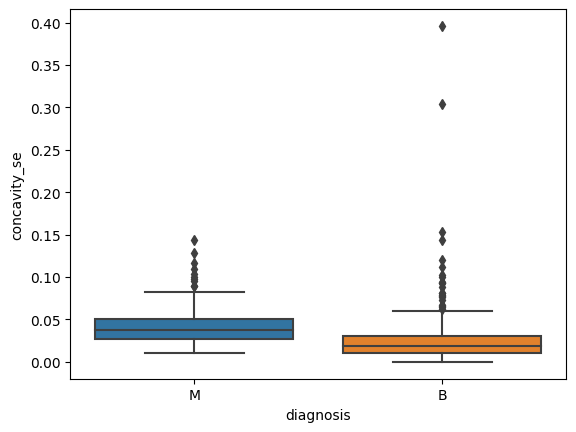

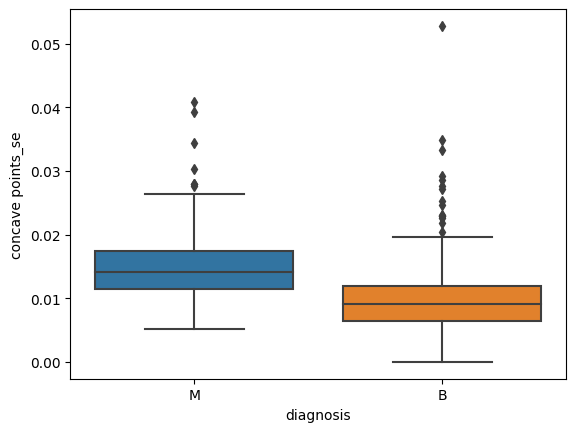

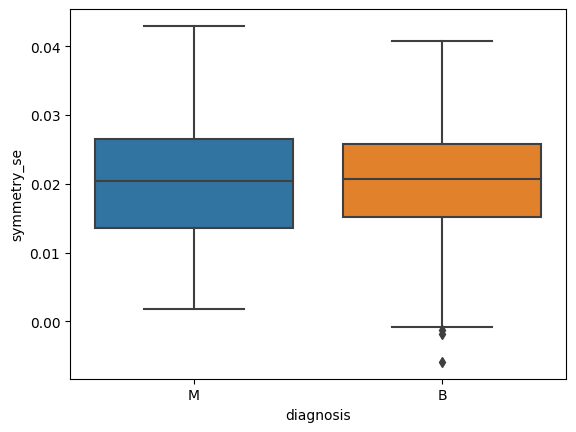

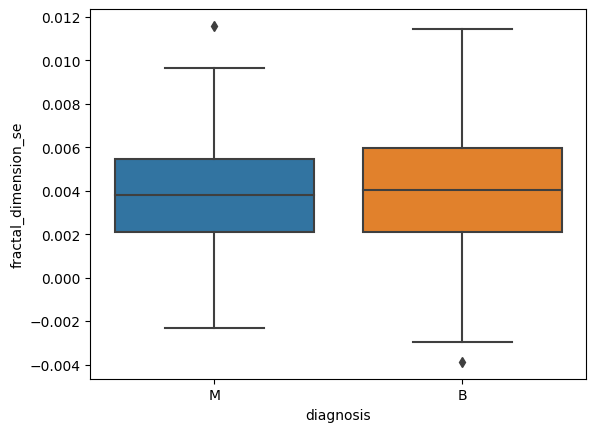

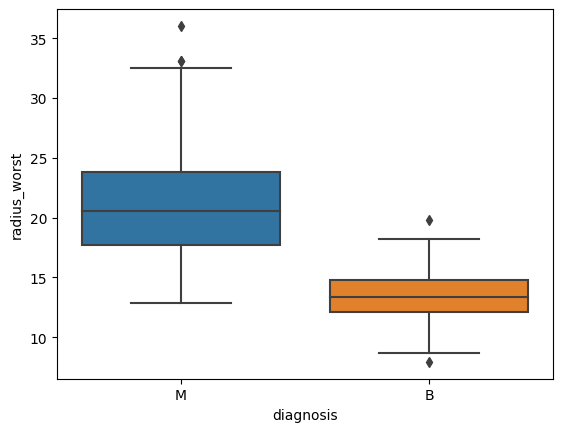

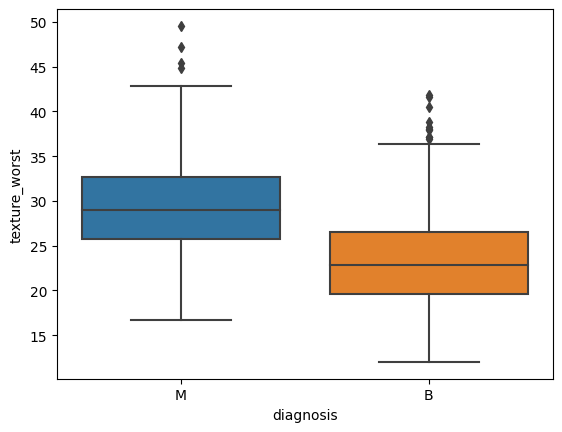

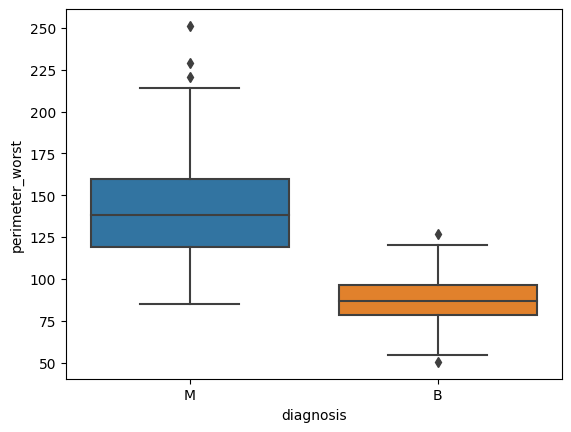

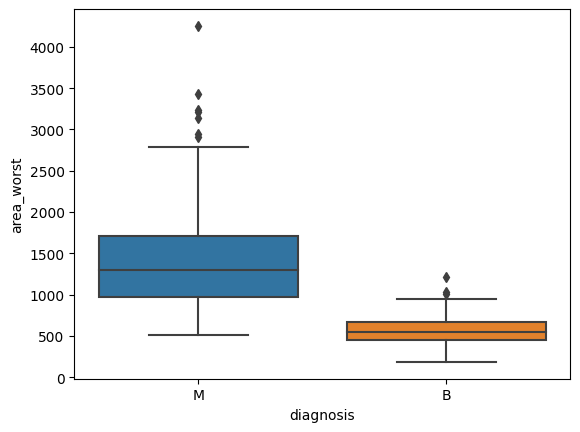

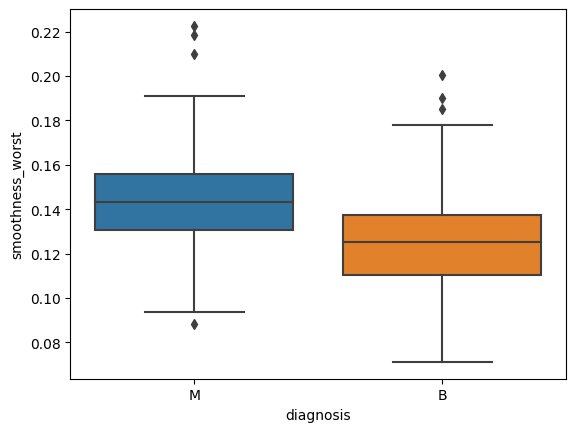

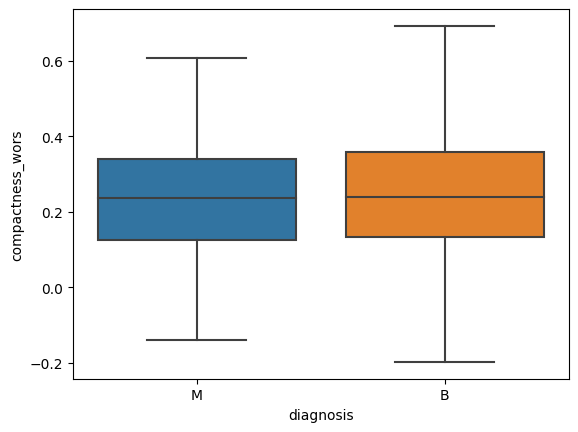

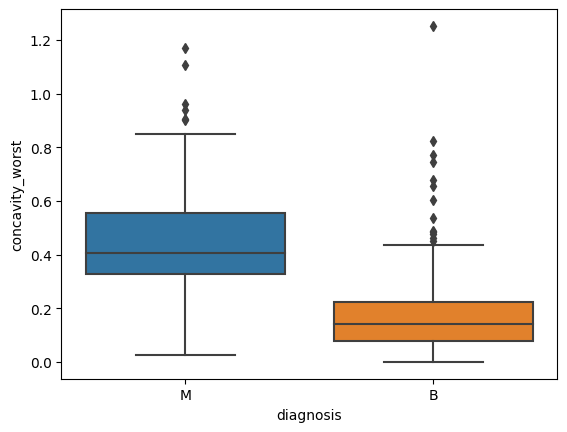

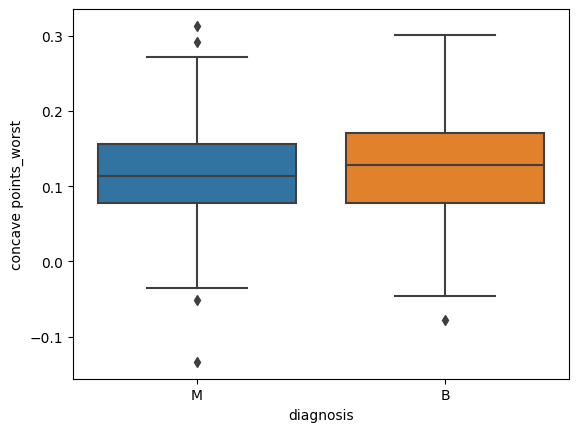

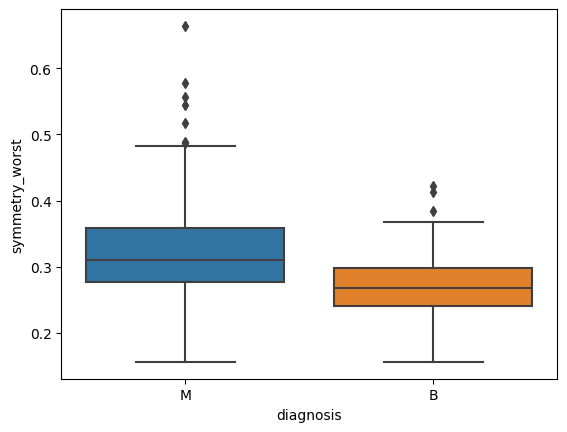

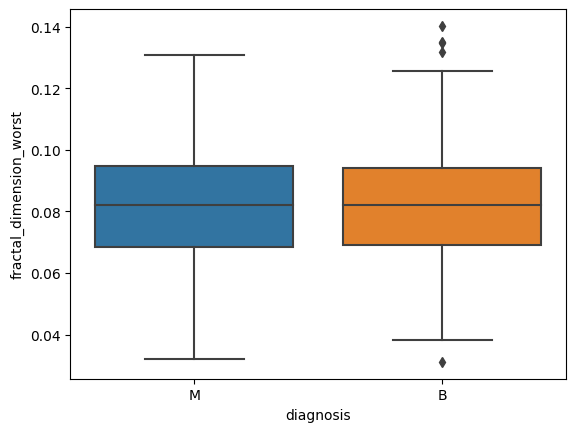

In [27]:
from matplotlib.pyplot import figure
for i in cancer_num.columns:
    figure()
    sns.boxplot(y=cancer_num[i],x=df_cancerdata['diagnosis'])

In [28]:
#calculating correlation among numeric variable 
corr_matrix = cancer_num.corr() 

corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.070425,-0.035228,-0.032708,0.024861,0.010012,-0.074375,-0.070011,0.046623,0.033805,0.012795,0.030862,0.009318,-0.046940,-0.042970,0.009876,-0.074536,-0.106635,-0.002874,0.005511,-0.037750,-0.054781,-0.035869,-0.041812,0.011173,-0.063024,-0.049089,-0.000033,0.013231,-0.019669
texture_mean,0.070425,1.000000,0.006155,0.008631,0.021654,0.047145,0.006832,0.077424,-0.023344,-0.003806,-0.061184,0.005729,0.056161,0.042223,-0.018967,0.024364,0.059769,0.041280,-0.032921,0.003319,0.008352,0.048012,0.010269,0.012803,0.033872,0.053946,0.044502,-0.049535,0.056662,-0.013935
perimeter_mean,-0.035228,0.006155,1.000000,0.986507,-0.043853,0.000807,0.049568,-0.071642,0.002254,0.040042,0.047773,0.028094,0.015025,0.744983,-0.029894,-0.025082,0.228082,0.407217,0.005295,-0.032627,0.969476,0.303038,0.970387,0.941550,0.150549,-0.020032,0.563879,-0.039836,0.189115,-0.012852
area_mean,-0.032708,0.008631,0.986507,1.000000,-0.047062,0.002561,0.040642,-0.060022,-0.001786,0.038391,0.057057,0.017864,0.014144,0.800086,-0.030848,-0.032259,0.207660,0.372320,0.001013,-0.035046,0.962746,0.287489,0.959120,0.959213,0.123523,-0.013764,0.512606,-0.036284,0.143570,-0.029543
smoothness_mean,0.024861,0.021654,-0.043853,-0.047062,1.000000,-0.041543,-0.002777,0.000010,0.032645,0.003785,0.047041,0.008970,-0.015423,-0.025343,0.094440,0.001379,0.009347,0.003734,0.073480,0.008877,-0.044234,-0.073102,-0.036288,-0.048910,-0.021490,0.044842,0.016772,0.065017,-0.038502,-0.029748
compactness_mean,0.010012,0.047145,0.000807,0.002561,-0.041543,1.000000,-0.002953,0.019169,-0.058799,0.005069,0.067240,0.016067,0.036341,0.033558,0.054655,-0.001585,0.013099,0.033779,0.018448,-0.022843,0.003426,0.048005,0.003217,0.009143,0.040886,-0.035002,-0.015305,0.052424,0.000749,-0.001925
concavity_mean,-0.074375,0.006832,0.049568,0.040642,-0.002777,-0.002953,1.000000,0.042943,0.039856,-0.037378,-0.004993,-0.009966,-0.035997,0.027478,-0.041651,0.013409,0.076777,0.075849,-0.012510,0.002185,0.019058,-0.052707,0.028040,0.009482,0.039363,-0.021552,0.077975,-0.074706,0.037577,-0.000306
concave points_mean,-0.070011,0.077424,-0.071642,-0.060022,0.000010,0.019169,0.042943,1.000000,-0.015877,-0.028798,-0.024701,-0.009831,0.085809,-0.012913,-0.009404,0.024362,-0.004215,-0.019548,-0.008168,0.042237,-0.062171,-0.026923,-0.065773,-0.047116,-0.002481,-0.007732,-0.041824,0.011258,-0.046071,0.063022
symmetry_mean,0.046623,-0.023344,0.002254,-0.001786,0.032645,-0.058799,0.039856,-0.015877,1.000000,-0.087283,0.036787,-0.029940,0.001912,0.007585,0.023663,-0.072867,-0.032407,-0.002997,0.044450,0.046550,-0.003456,-0.040158,-0.004209,-0.005463,0.013762,-0.030260,-0.011905,0.002119,0.033243,0.029987
fractal_dimension_mean,0.033805,-0.003806,0.040042,0.038391,0.003785,0.005069,-0.037378,-0.028798,-0.087283,1.000000,0.012801,0.045559,0.036674,-0.001993,0.016563,-0.004311,0.013470,0.030955,0.034683,0.021137,0.041064,0.001621,0.045751,0.037970,0.058127,-0.012873,0.043386,-0.010030,0.026701,0.034839


<AxesSubplot: >

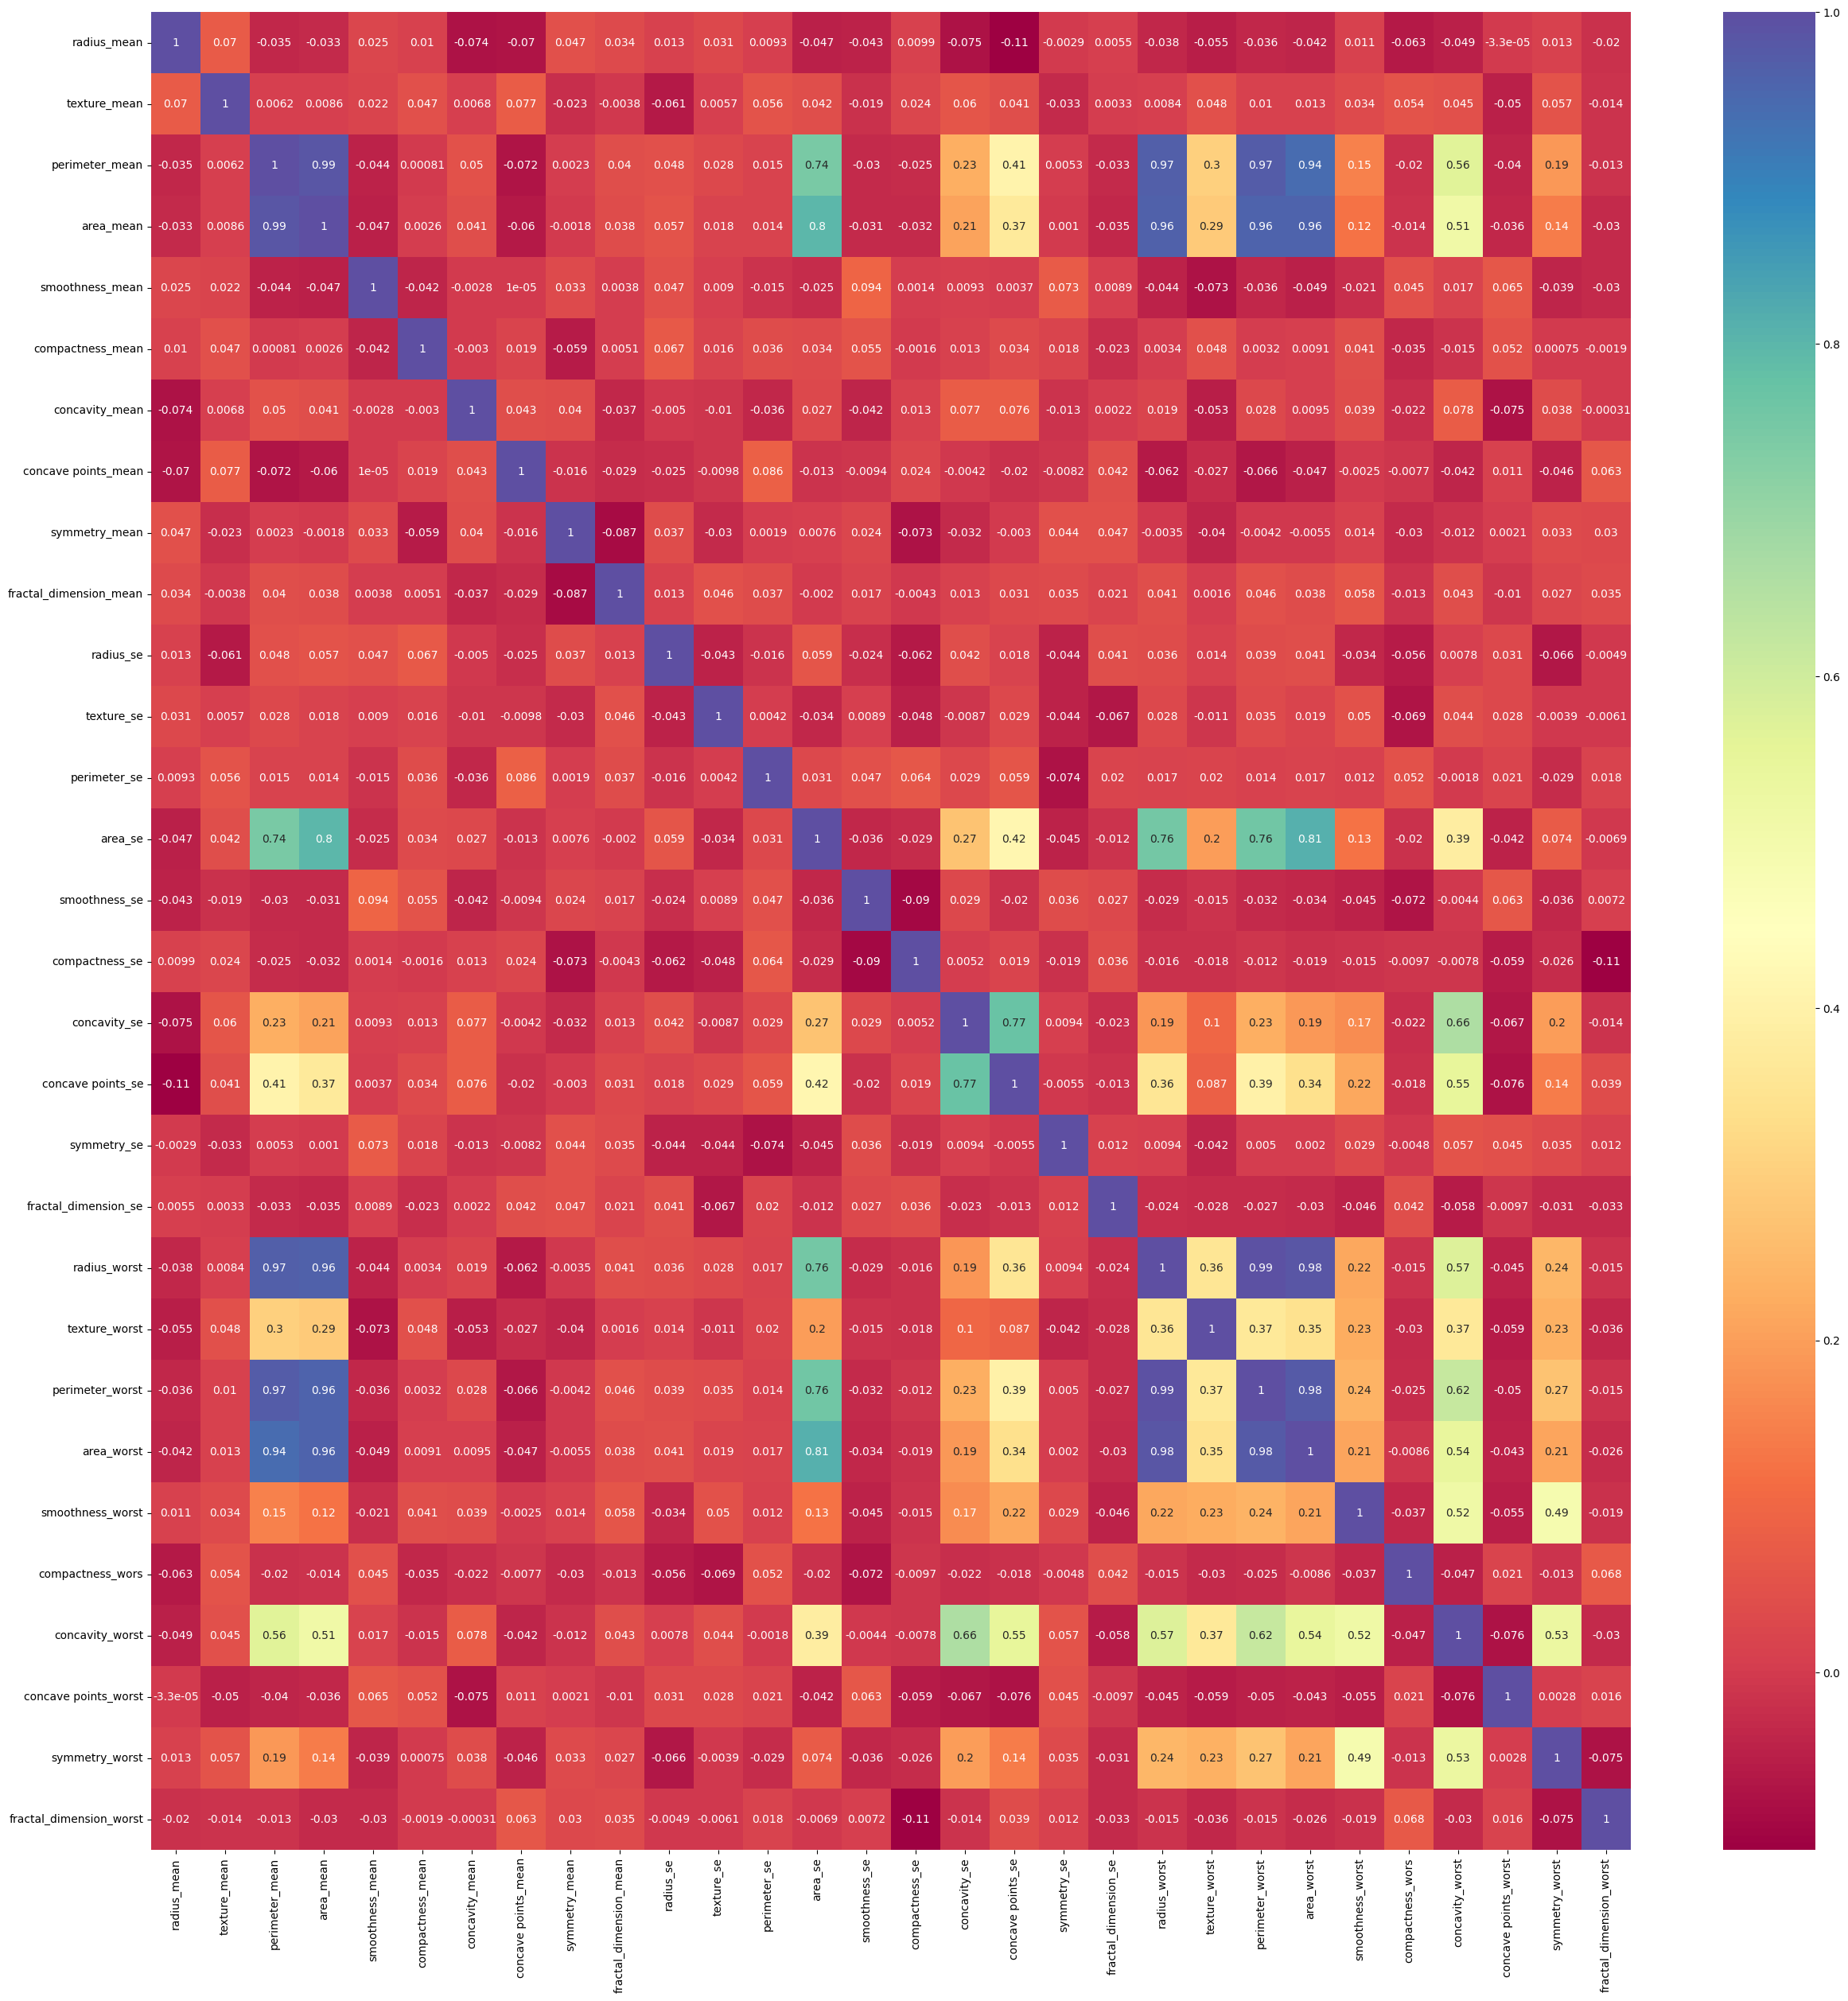

In [29]:
#plot correlation matrix
plt.figure(figsize=(30,30))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True)

In [30]:
df_cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Convert diagnosis value of M and B to a numerical value

In [31]:
# Change M & B 
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df_cancerdata['diagnosis'] = df_cancerdata['diagnosis'].apply(diagnosis_value)

### Splitting the data: training and test

In [32]:
# Train-Test-Split 
from sklearn.model_selection import train_test_split
X = df_cancerdata.drop(['diagnosis'], axis=1)
Y = df_cancerdata ['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33,
                                                    random_state = 42)

In [33]:
x,y=10,22

### KNN implementation
Now we are fitting KNN algorithm on training data, predicting labels for dataset and printing the accuracy of the model for different values of K

In [34]:
# Create-KNN-model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(x_train, y_train) 
    y_pred = neigh.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  93.08510638297872 % for K-Value: 1
Accuracy is  94.14893617021278 % for K-Value: 2
Accuracy is  93.08510638297872 % for K-Value: 3
Accuracy is  93.61702127659575 % for K-Value: 4
Accuracy is  94.68085106382979 % for K-Value: 5
Accuracy is  95.74468085106383 % for K-Value: 6
Accuracy is  96.80851063829788 % for K-Value: 7
Accuracy is  96.80851063829788 % for K-Value: 8
Accuracy is  96.80851063829788 % for K-Value: 9
Accuracy is  96.27659574468085 % for K-Value: 10
Accuracy is  97.87234042553192 % for K-Value: 11
Accuracy is  97.3404255319149 % for K-Value: 12
Accuracy is  96.80851063829788 % for K-Value: 13
Accuracy is  96.80851063829788 % for K-Value: 14
Accuracy is  96.80851063829788 % for K-Value: 15
Accuracy is  96.80851063829788 % for K-Value: 16
Accuracy is  96.80851063829788 % for K-Value: 17
Accuracy is  96.80851063829788 % for K-Value: 18
Accuracy is  96.80851063829788 % for K-Value: 19
Accuracy is  95.74468085106383 % for K-Value: 20
Accuracy is  96.27659574468085

In [35]:
?KNeighborsClassifier

It shows that we are getting highest accuracy 97.87 on k=11 

In [36]:
neigh = KNeighborsClassifier(n_neighbors = 11, weights='distance', algorithm='auto')

In [37]:
neigh.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [38]:
y_pred = neigh.predict(x_test)
    
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9680851063829787


In [40]:
#neigh.fit(x_train, y_train) 

In [41]:
#y_pred = neigh.predict(x_test)
    
#y_pred

In [42]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9680851063829787


In [43]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above

confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=[' Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,120,1,121
1,5,62,67
All,125,63,188


Text(0.5, 23.52222222222222, 'Predicted label')

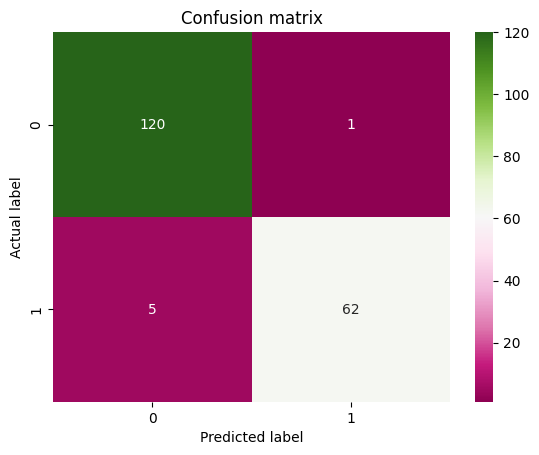

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG" ,fmt='g')#PiYG  #YlGnBu
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')#YlGnBu

In [45]:
?sns.heatmap

In [46]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       121
           1       0.98      0.93      0.95        67

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



In [47]:
from sklearn.metrics import roc_curve
y_pred_proba = neigh.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

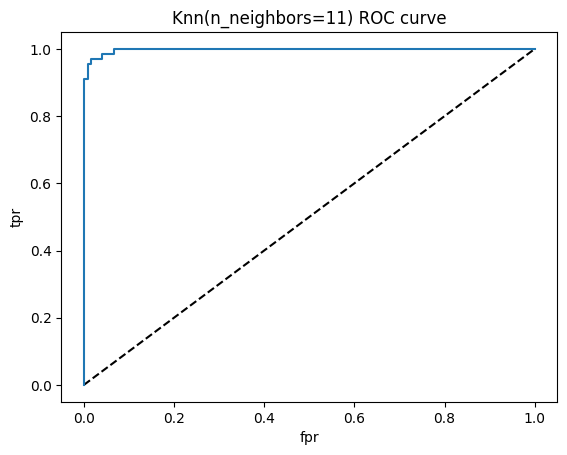

In [48]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [49]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
  
dataset = load_iris()
object= StandardScaler()
  
# Splitting the independent and dependent variables
i_data = dataset.data
response = dataset.target
  
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [50]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
  
dataset = sns.load_dataset('iris')
object= StandardScaler()
  
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
# Splitting the independent and dependent variables
i_data = dataset.iloc[:,0:4]
response = dataset['species']
  
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [52]:
scale.shape

(150, 4)

In [53]:
import pandas as pd

scaled_df=pd.DataFrame(scale)

scaled_df.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [54]:
scaled_df.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [55]:
from sklearn.preprocessing import MinMaxScaler
# define data
i_data = dataset.iloc[:,0:4]
response = dataset['species']
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(i_data)
scaled_df_min_max=pd.DataFrame(scaled)

scaled_df_min_max.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [56]:
scaled_df_min_max.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000
